## Machine Learning Assignment 03
### Student: Xinlu Xiao
### Contact: xinluxiao.baruch@gmail.com

In [1]:
# import packages
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# sigmoid and dsigmoid function
sigmoid = lambda x: 1/(1+np.exp(-x))
dsigmoid = lambda x: sigmoid(x) * (1-sigmoid(x))

In [3]:
def get_test_data(num_pts):
    centers = [(0,0,1), (1,1,-1), (1,-1,1), (-2,0,-1), (4,1,1)]
    X = np.random.rand(num_pts, F)*10 -5
    
    def get_y(x):
        distances = [np.sqrt(np.sum((x - c[:2])**2)) for c in centers]
        which = np.argmin(distances)
        return centers[which][2] * distances[which]
    
    Y = np.array([get_y(x) for x in X])
    return X,Y

In [4]:
# X: 50000 rows, 2 cols
np.random.seed(0)
N = 50000
F = 2
X,Y = get_test_data(N)

# give bias to X
X_with_bias = np.append(X, np.ones((N,1)),axis = 1)

In [5]:
# test etas
etas = [0.05, 0.1,0.125, 0.2, 0.25, 0.5]

# number of epoch
num_epoch = 50

# hidden layer -> output layer initial weights
wp_out = np.array([0.5,0.25,-0.2,-0.1]) 
# input layer -> hidden layer initial weights
wp = np.array([[0.5,-1,-0.25],
             [0.35,0.6,0.1],
             [0.15,0.8,-0.5]])

In [6]:
def backprop(eta, wp, wp_out, num_epoch, X,Y):
    '''implement forward and backpropagation, and use gradient descent to optimize the neutral network, 
    and return the iterations and MSE for each iteration
    
    Parameters
    ----------
    eta: double
         learning rate of gradient descent
    wp:  numpy ndarray
         weights from input layer to hidden layer
    wp_out: numpy ndarray
         weights from hidden layer to output layer
    num_epoch: int
         number of iterations
    X:   numpy ndarray
         input data
    Y:   numpy ndarray
         input data
         
    Returns
    -------
    iterations: list
                store the iteration corresponding to the MSE
    losses:     list
                MSE  
    '''
    # initialize the returns
    losses = []
    iterations = []
    for i in range(num_epoch):
        xp = X
        yp = Y
        '''
        Part1: forward propagation
        '''
        # X*beta(with bias)
        hidden_pre = xp.dot(wp.T)
        # hidden layer value
        hidden = sigmoid(hidden_pre)
        # add the bias term to hidden layer value
        hidden_plus = np.hstack([hidden, np.ones((N,1))])
        # output value
        output = hidden_plus.dot(wp_out)
        # MSE
        loss = 1/N * np.sum((output - yp)**2)
        losses.append(loss)
   
        '''
        Part2: backpropagation
        '''
        # from MSE to output
        dloss_dout = 2/N*(output - yp)
        # from output to wp_out weights
        dout_dwp_out = hidden_plus
        # result: from MSE to wp_out weights -> used to optimize "wp_out"
        dloss_dwp_out = dloss_dout.T.dot(dout_dwp_out)
        
        # from output to hidden layer value
        dout_dhidden = wp_out[:3]
        # from hidden layer to X*beta
        dhidden0_dpre = dsigmoid(hidden_pre[:,0])
        dhidden1_dpre = dsigmoid(hidden_pre[:,1])
        dhidden2_dpre = dsigmoid(hidden_pre[:,2])   
        # from X*beta to wp weights
        dpre_dwp = xp
        
        # result: from hidden layer to wp weights
        dhidden0_dwp = np.array([dhidden0_dpre[j] * dpre_dwp[j,:] for j in range(N)])
        dhidden1_dwp = np.array([dhidden1_dpre[j] * dpre_dwp[j,:] for j in range(N)])
        dhidden2_dwp= np.array([dhidden2_dpre[j] * dpre_dwp[j,:] for j in range(N)])
        # result: from output to wp weights
        dout0_dwp = dout_dhidden[0]*dhidden0_dwp
        dout1_dwp = dout_dhidden[1]*dhidden1_dwp
        dout2_dwp = dout_dhidden[2]*dhidden2_dwp
        # result: from MSE to wp weights -> used to optimize "wp"
        dloss0_dwp = dloss_dout.dot(dout0_dwp)
        dloss1_dwp = dloss_dout.dot(dout1_dwp)
        dloss2_dwp = dloss_dout.dot(dout2_dwp)
        
        # concatenate
        dloss_dw = np.vstack([dloss0_dwp,dloss1_dwp,dloss2_dwp])
       
        iterations.append(i+1)
        
        # gradient descent
        wp_out = wp_out - eta*dloss_dwp_out
        wp = wp - eta*dloss_dw
        
    return [iterations, losses]

In [7]:
iterations_set = []
losses_set = []

In [8]:
# test for different etas
for eta in etas:
    result = backprop(eta, wp, wp_out, num_epoch, X_with_bias,Y)
    iterations_set.append(result[0])
    losses_set.append(result[1])

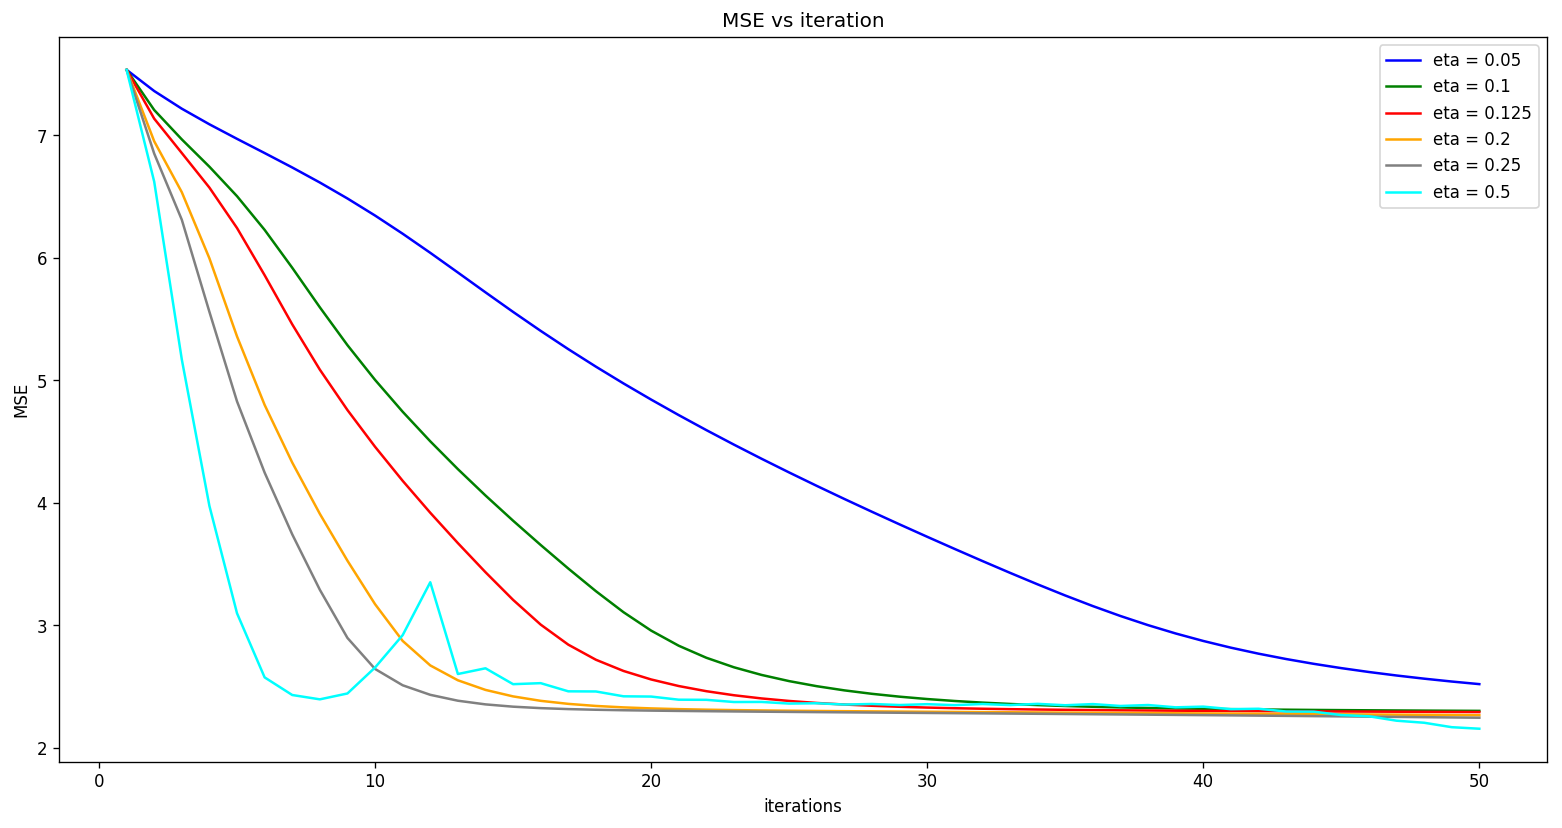

In [9]:
cols = ['blue','green','red','orange','grey', 'cyan','magenta','khaki', 'salmon']
plt.figure(figsize=(16,8),dpi= 120)
for i in range(len(etas)):
    plt.plot(iterations_set[i], losses_set[i], cols[i], label = 'eta = {}'.format(etas[i]))
plt.legend(loc = 'upper right')
plt.xlabel('iterations')
plt.ylabel('MSE')
plt.title('MSE vs iteration')

#### Conclusion:

For different $\eta$, we can conclude that the smaller the eta, the slower the rate to converge to a stable MSE.